In [1]:
using Pkg; 
Pkg.add(["Flux", "Plots"])
using Flux, Plots

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/julia/learn-julia/Project.toml`
 [no changes]
   Updating `~/julia/learn-julia/Manifest.toml`
 [no changes]


Sigmoid Function

In [2]:
?σ

"σ" can be typed by \sigma<tab>

search: σ logσ hardσ



```
σ(x) = 1 / (1 + exp(-x))
```

Classic [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation function.


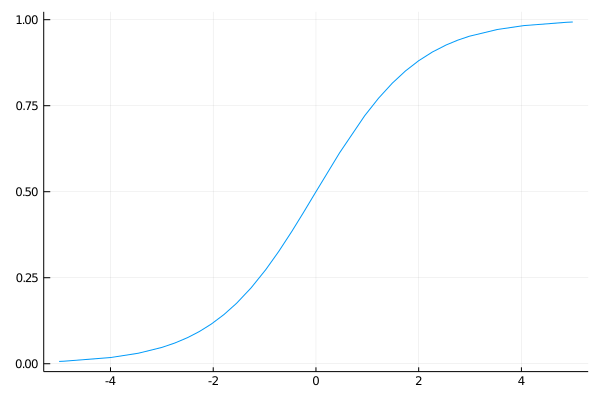

In [3]:
plot(σ, legend=false)

Neural Networks

In [4]:
model = Dense(2, 1, σ)

Dense(2, 1, σ)

In [5]:
println(model.W)
println(model.b)

Float32[1.0618362 -1.0697467]
Float32[0.0]


In [6]:
x = rand(2)
model(x)

1-element Array{Float32,1}:
 0.5927469

In [7]:
σ.(model.W*x + model.b)

1-element Array{Float64,1}:
 0.5927469147752826

Loss Functions

In [8]:
methods(Flux.mse)

# 1 method for generic function "mse":
[1] mse(ŷ, y) in Flux at /home/sahil/.julia/packages/Flux/Fj3bt/src/layers/stateless.jl:23

**Image Classification with Basic MLP**

In [9]:
Pkg.add(["CSV", "DataFrames"])
using CSV, DataFrames

  Resolving package versions...
   Updating `~/julia/learn-julia/Project.toml`
 [no changes]
   Updating `~/julia/learn-julia/Manifest.toml`
 [no changes]


In [10]:
apples = DataFrame(CSV.File("data/apples.dat", delim="\t", normalizenames=true))
bananas = DataFrame(CSV.File("data/bananas.dat", delim="\t", normalizenames=true))

,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,98,99,0.583507,0.500662,0.207504
2,50,99,0.609666,0.514869,0.186871
3,52,99,0.610012,0.515759,0.187504
4,99,69,0.568033,0.492939,0.239316
5,51,99,0.609766,0.51485,0.183329
6,53,99,0.608089,0.514609,0.183374
7,53,99,0.608676,0.515487,0.186206
8,53,99,0.609278,0.516486,0.188582
9,99,67,0.569099,0.494501,0.241941


In [11]:
x_apples = [[row.red, row.green] for row in eachrow(apples)]
x_bananas = [[row.red, row.green] for row in eachrow(bananas)]

490-element Array{Array{Float64,1},1}:
 [0.5835067538126356, 0.500662309368192]
 [0.6096658836445241, 0.514868541076373]
 [0.61001222127424, 0.5157592947018083]
 [0.5680333392636676, 0.4929391278094967]
 [0.6097662880271572, 0.5148498882514222]
 [0.6080886893475433, 0.5146088965412025]
 [0.6086763977507786, 0.5154866998805462]
 [0.6092775365179625, 0.5164860873506747]
 [0.5690986557452848, 0.4945007761667278]
 [0.610284435646972, 0.5161825666623635]
 [0.607329117213896, 0.5153440757746397]
 [0.6083665640474657, 0.5146497517166334]
 [0.6063312071816673, 0.5137782965773128]
 ⋮
 [0.5291302161890399, 0.4403100385453329]
 [0.5287307644576823, 0.4565478406552493]
 [0.5240277326400172, 0.45237940480059413]
 [0.5239057876671794, 0.4525711129522229]
 [0.5238233433790978, 0.45140008185437314]
 [0.5224889335097888, 0.44997337957681116]
 [0.5175726263709806, 0.4443909309164674]
 [0.5159556048834634, 0.4419119496855347]
 [0.5175850178187539, 0.44482679017155075]
 [0.5103568171454631, 0.436022286821

In [12]:
X = [x_apples; x_bananas]
y = [fill(0, size(x_apples)); fill(1, size(x_bananas))]

982-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [13]:
model = Dense(2, 1, σ)

Dense(2, 1, σ)

In [14]:
model(X[1])

1-element Array{Float32,1}:
 0.44927463

In [15]:
loss = Flux.mse(model(X[1]), y[1])

0.20184769f0

In [16]:
Pkg.add("Zygote")
using Zygote

  Resolving package versions...
   Updating `~/julia/learn-julia/Project.toml`
 [no changes]
   Updating `~/julia/learn-julia/Manifest.toml`
 [no changes]


In [17]:
?Flux.train!

```
train!(loss, params, data, opt; cb)
```

For each datapoint `d` in `data` compute the gradient of `loss(d...)` through backpropagation and call the optimizer `opt`.

In case datapoints `d` are of numeric array type, assume no splatting is needed and compute the gradient of `loss(d)`.

A callback is given with the keyword argument `cb`. For example, this will print "training" every 10 seconds (using [`Flux.throttle`](@ref)):

train!(loss, params, data, opt,          cb = throttle(() -> println("training"), 10))

The callback can call [`Flux.stop`](@ref) to interrupt the training loop.

Multiple optimisers and callbacks can be passed to `opt` and `cb` as arrays.


In [18]:
params(model)

Params([Float32[0.20507948 -1.336399], Float32[0.0]])

In [19]:
model = Dense(2, 1, σ)
L(x,y) = Flux.mse(model(x), y)
ps = params(model)
opt = ADAM()
Flux.train!(L, ps, zip(X, y), opt)

In [20]:
for step in 1:100
    Flux.train!(L, ps, zip(X, y), opt)
end

**Multiclassification Task**

In [21]:
apples = DataFrame(CSV.File("data/apples.dat", delim="\t", normalizenames=true))[1:490, :]
bananas = DataFrame(CSV.File("data/bananas.dat", delim="\t", normalizenames=true))
grapes = DataFrame(CSV.File("data/grapes.dat", delim="\t", normalizenames=true))

,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,98,84,0.615648,0.625358,0.435313
2,98,84,0.623257,0.64083,0.463301
3,99,83,0.622386,0.640902,0.463111
4,99,83,0.622452,0.64107,0.463373
5,99,84,0.621801,0.641156,0.462681
6,99,84,0.622526,0.641055,0.463552
7,99,84,0.622833,0.641057,0.465057
8,99,84,0.622422,0.64084,0.463884
9,99,85,0.61479,0.623654,0.435193


In [22]:
x_apples = [[i.red, i.blue] for i in eachrow(apples)]
x_bananas = [[i.red, i.blue] for i in eachrow(bananas)]
x_grapes = [[i.red, i.blue] for i in eachrow(grapes)]
X = vcat(x_apples, x_bananas, x_grapes)
y = vcat(fill([1,0,0], size(x_apples)), fill([0,1,0], size(x_bananas)), fill([0,0,1], size(x_grapes)))

1470-element Array{Array{Int64,1},1}:
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 ⋮
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]

In [23]:
#Store one hot vectors as ints instead of arrays
using Flux: onehot
dump(onehot(2, 1:8))

Flux.OneHotVector
  ix: UInt32 0x00000002
  of: UInt32 0x00000008


In [24]:
y = vcat(fill(onehot(1, 1:3), size(x_apples)),
         fill(onehot(2, 1:3), size(x_bananas)),
         fill(onehot(1, 1:3), size(x_grapes)))

1470-element Array{Flux.OneHotVector,1}:
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 ⋮
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]

In [25]:
model = Dense(2, 3, σ)
L(x,y) = Flux.mse(model(x),y)
opt = ADAM()
Flux.train!(L, params(model), zip(X,y), opt)

In [26]:
for _ in 1:100
    Flux.train!(L, params(model), zip(X,y), opt)
end

This model is not complex enough to properly classify the images. Let's try deep neural networks

In [27]:
layer1 = Dense(2, 4, σ)
layer2 = Dense(4, 3, σ)

Dense(4, 3, σ)

In [28]:
layer1(X[1])
layer2(layer1(X[1]))

3-element Array{Float32,1}:
 0.520763
 0.32688698
 0.7404136

In [29]:
?Chain

search: Chain batched_adjoint



```
Chain(layers...)
```

Chain multiple layers / functions together, so that they are called in sequence on a given input.

`Chain` also supports indexing and slicing, e.g. `m[2]` or `m[1:end-1]`. `m[1:3](x)` will calculate the output of the first three layers.

# Examples

```jldoctest
julia> m = Chain(x -> x^2, x -> x+1);

julia> m(5) == 26
true

julia> m = Chain(Dense(10, 5), Dense(5, 2));

julia> x = rand(10);

julia> m(x) == m[2](m[1](x))
true
```


In [30]:
m = Chain(layer1, layer2)
m(X[1])

3-element Array{Float32,1}:
 0.520763
 0.32688698
 0.7404136

In [31]:
#Piping can also work
X[1] |> layer1 |> layer2

3-element Array{Float32,1}:
 0.520763
 0.32688698
 0.7404136

In [32]:
opt

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}(Float32[-3.1435862 5.4490194; 3.239126 -5.4921384; -7.13567 -4.7502985] => (Float32[-0.013789334 -0.0098120505; 0.013758268 0.009789349; 4.407676f-13 3.1389613f-13], Float32[0.0011460605 0.00021970666; 0.0011442804 0.00021925892; 5.843506f-22 3.7600875f-23], (2.5e-323, 3.073281911462156e-65)),Float32[0.89198655, -0.9323777, -7.4754777] => (Float32[-0.023063835, 0.023011612, 7.3813915f-13], Float32[0.0037597422, 0.0037539105, 3.1857912f-21], (2.5e-323, 3.073281911462156e-65))))

In [33]:
model = Chain(Dense(2, 4, σ), Dense(4, 3, σ))
L(x, y) = Flux.mse(model(x), y)
ps = Flux.params(model)
opt = ADAM()
@time Flux.train!(L, ps, zip(X, y), opt)

  0.777287 seconds (1.90 M allocations: 83.708 MiB, 4.66% gc time)


Use batching to improve efficiency

In [34]:
Flux.batch(X)

2×1470 Array{Float64,2}:
 0.501466  0.434225  0.43412   0.432922  …  0.592942  0.593707  0.5919
 0.148436  0.108166  0.108348  0.106358     0.454372  0.453736  0.451744

In [35]:
model(Flux.batch(X))

3×1470 Array{Float32,2}:
 0.753872   0.74779    0.747798   …  0.776114   0.776108   0.775935
 0.262347   0.267341   0.267329      0.239404   0.239425   0.23958
 0.0882907  0.0919399  0.0919322     0.0737148  0.0737252  0.0738196

In [36]:
databatch = (Flux.batch(X), Flux.batch(y))
@time Flux.train!(L, ps, (databatch,), opt)
@time Flux.train!(L, ps, (databatch,), opt)

  2.474961 seconds (6.77 M allocations: 332.747 MiB, 3.03% gc time)
  0.000995 seconds (15.11 k allocations: 553.266 KiB)


In [37]:
for _ in 1:10000
    Flux.train!(L, ps, (databatch,), opt)
end

Cross entropy would be a better loss function as the graph below shows since it would more heavily penalize wrong answers

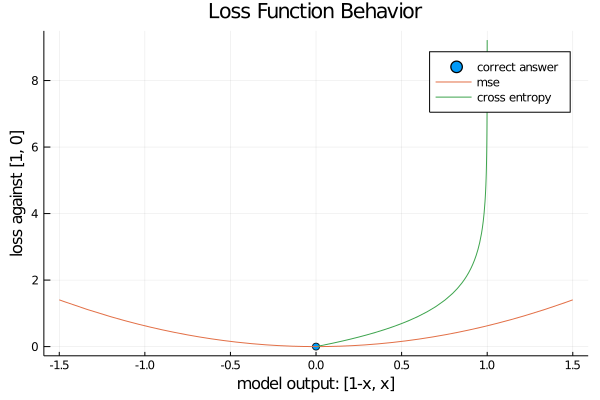

In [41]:
scatter([0],[0], label="correct answer", xlabel="model output: [1-x, x]")
plot!(x->Flux.mse([1-x, x/2], [1,0]), -1.5, 1.5, label="mse")
plot!(x->Flux.crossentropy([1-x, x/2], [1,0]), 0, 1, label="cross entropy")
xlabel!("model output: [1-x, x]")
ylabel!("loss against [1, 0]")
title!("Loss Function Behavior")

In [42]:
println(Flux.mse([0.98, 0.01, 0.01], [1.0,0,0]))
Flux.mse([0.01,0.98,0.01], [1.0,0,0])

0.00020000000000000025


0.6468666666666666

In [43]:
println(Flux.crossentropy([0.98, 0.01, 0.01], [1.0,0,0]))
Flux.crossentropy([0.01,0.98,0.01], [1.0,0,0])

0.020202707317519466


4.605170185988091

Softmax converts losses to probabilities

In [44]:
softmax(model(X[1]))

3-element Array{Float32,1}:
 0.41457465
 0.35307106
 0.23235422

In [46]:
sum(softmax(model(X[1])))

0.99999994f0

In [49]:
model = Chain(Dense(2, 4, σ), Dense(4, 3, identity), softmax)
ps = params(model)
L(x,y) = Flux.crossentropy(model(x), y)
opt = ADAM()
Flux.train!(L, ps, Iterators.repeated(databatch, 5000), opt)

**Handwritten Recognition Example**

In [65]:
Pkg.add("Images")
Pkg.add(["ImageMagick","ImageIO"])

using Flux.Data.MNIST, Images, ImageMagick, ImageIO

  Resolving package versions...
   Updating `~/julia/learn-julia/Project.toml`
 [no changes]
   Updating `~/julia/learn-julia/Manifest.toml`
 [no changes]
  Resolving package versions...
  Installed JpegTurbo_jll ─── v2.0.1+0
  Installed CEnum ─────────── v0.2.0
  Installed Zstd_jll ──────── v1.4.4+1
  Installed ImageMagick_jll ─ v6.9.10-12+3
  Installed Libtiff_jll ───── v4.1.0+0
  Installed ImageIO ───────── v0.1.1
  Installed ImageMagick ───── v1.1.5
  Installed PNGFiles ──────── v0.1.3
  Installed libpng_jll ────── v1.6.37+3
######################################################################### 100.0%#=#=-#  #                                                                      
######################################################################### 100.0%
######################################################################### 100.0%##O=#  #                                                                       
################################################################

In [52]:
labels = MNIST.labels();
images = MNIST.images();

┌ Info: Downloading MNIST dataset
└ @ Flux.Data.MNIST /home/sahil/.julia/packages/Flux/Fj3bt/src/data/mnist.jl:24
┌ Info: Downloading MNIST dataset
└ @ Flux.Data.MNIST /home/sahil/.julia/packages/Flux/Fj3bt/src/data/mnist.jl:24
┌ Info: Downloading MNIST dataset
└ @ Flux.Data.MNIST /home/sahil/.julia/packages/Flux/Fj3bt/src/data/mnist.jl:24
┌ Info: Downloading MNIST dataset
└ @ Flux.Data.MNIST /home/sahil/.julia/packages/Flux/Fj3bt/src/data/mnist.jl:24


In [53]:
length(labels)

60000

┌ Info: Precompiling ImageIO [82e4d734-157c-48bb-816b-45c225c6df19]
└ @ Base loading.jl:1260
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1260


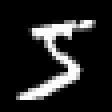

In [66]:
images[1]

In [58]:
size(images[1])

(28, 28)

In [59]:
Float64.(images[1])

28×28 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.498039  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.25098   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 ⋮                         

In [67]:
n_inputs = unique(length.(images))[]

784

In [68]:
n_outputs = length(unique(labels))

10

In [60]:
preprocess(img) = vec(Float64.(img))

preprocess (generic function with 1 method)

In [61]:
X = preprocess.(images[1:5000])

5000-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0

In [62]:
y = [Flux.onehot(label, 0:9) for label in labels[1:5000]]

5000-element Array{Flux.OneHotVector,1}:
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [63]:
function create_batch(r)
    X = [preprocess(img) for img in images[r]]
    y = [Flux.onehot(label, 0:9) for label in labels[r]]
    return (Flux.batch(X), Flux.batch(y))
end

create_batch (generic function with 1 method)

In [64]:
trainbatch = create_batch(1:5000);

One layer

In [69]:
model = Chain(Dense(n_inputs, n_outputs, identity), softmax)
ps = params(model)
L(x,y) = Flux.crossentropy(model(x), y)
opt = ADAM()
@time Flux.train!(L, ps, [trainbatch], opt)
@time Flux.train!(L, ps, [trainbatch], opt)

  1.919279 seconds (21.18 M allocations: 449.740 MiB, 5.59% gc time)
  0.962229 seconds (19.75 M allocations: 379.567 MiB, 13.54% gc time)


In [70]:
Iterators.repeated(trainbatch, 100);

In [71]:
L(trainbatch...)

2.2734838f0

In [72]:
@time Flux.train!(L, ps, [trainbatch], opt)

  0.879398 seconds (19.75 M allocations: 379.567 MiB, 11.79% gc time)


In [73]:
L(trainbatch...)

2.2203956f0

Using callbacks

In [75]:
callback() = @show(L(trainbatch...))
Flux.train!(L, ps, Iterators.repeated(trainbatch, 3), opt; cb=callback)

L(trainbatch...) = 2.12085f0
L(trainbatch...) = 2.0738566f0
L(trainbatch...) = 2.0284102f0


In [77]:
Flux.train!(L, ps, Iterators.repeated(trainbatch, 40), opt; cb=Flux.throttle(callback, 1))

L(trainbatch...) = 1.9843317f0
L(trainbatch...) = 1.8591453f0
L(trainbatch...) = 1.7433413f0
L(trainbatch...) = 1.6364793f0
L(trainbatch...) = 1.538527f0
L(trainbatch...) = 1.449304f0
L(trainbatch...) = 1.3683542f0
L(trainbatch...) = 1.2950794f0
L(trainbatch...) = 1.2288724f0
L(trainbatch...) = 1.1691343f0
L(trainbatch...) = 1.1152467f0
L(trainbatch...) = 1.0665796f0
L(trainbatch...) = 1.0225253f0
L(trainbatch...) = 0.98253477f0


In [78]:
testbatch = create_batch(5001:10000);

In [136]:
using Printf
train_loss = []
test_loss = []
function update_loss!()
    train_val = L(trainbatch...)
    test_val = L(testbatch...)
    push!(train_loss, train_val)
    push!(test_loss, test_val)
    @printf("train loss = %.2f, test loss=%.2f\n", train_val, test_val)
end

update_loss! (generic function with 1 method)

In [ ]:
Flux.train!(L, ps, Iterators.repeated(trainbatch, 1000), opt; cb=Flux.throttle(update_loss!, 1))

train loss = 0.25, test loss=0.37
train loss = 0.25, test loss=0.37
train loss = 0.24, test loss=0.37
train loss = 0.24, test loss=0.37
train loss = 0.24, test loss=0.37
train loss = 0.24, test loss=0.37
train loss = 0.24, test loss=0.37
train loss = 0.24, test loss=0.37
train loss = 0.24, test loss=0.37
train loss = 0.24, test loss=0.37
train loss = 0.24, test loss=0.37
train loss = 0.24, test loss=0.36
train loss = 0.24, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.23, test loss=0.36
train loss = 0.22, test loss=0.36
train loss = 0.22, test loss=0.36
train loss = 0.22, test loss=0.36
train loss = 0.22, test loss=0.36
train loss = 0

In [ ]:
using Plots
plot(1:length(train_loss), train_loss, xlabel="~seconds of training", label="train")
plot!(1:length(test_loss), test_loss, label="test")
title!("Train vs Test Loss")
ylabel!("Loss")

Evaluation

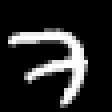

UndefVarError: UndefVarError: preprocesss not defined

In [104]:
i = 5001
display(images[i])
labels[i], findmax(model(preprocesss(images[i]))) .- (0,1)

In [113]:
model(preprocess(images[i]))

10-element Array{Float32,1}:
 0.0002704562
 7.992958f-5
 0.23280923
 0.015192832
 0.0012169334
 2.4877887f-5
 0.00026368376
 0.7408992
 0.0055963187
 0.003646489

In [112]:
prediction(i) = findmax(model(preprocess(images[i])))[2] - 1

prediction (generic function with 1 method)

In [114]:
sum(prediction(i) == labels[i] for i in 1:5000)/5000

0.9424

In [115]:
sum(prediction(i) == labels[i] for i in 5001:10000)/5000

0.8952

Hidden Layer and ReLU Activation

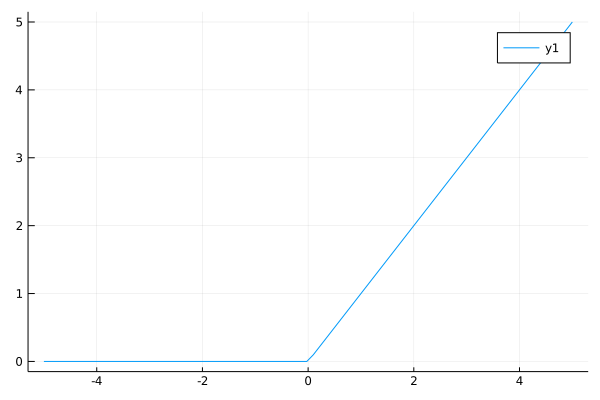

In [111]:
plot(relu)

In [ ]:
n_hidden = 20
model = Chain(Dense(n_inputs, n_hidden, relu),
              Dense(n_hidden, n_ouput, identity),
              softmax)
p = params(model)
L(x,y) = Flux.crossentropy(model(x,y))
opt = ADAM()

In [ ]:
train_loss = Float64[]
test_loss = Float64[]
Flux.train!(L, p, Iterators.repeated(trainbatch, 1000), opt; cb=Flux.throttle(update_loss!, 1))

In [ ]:
using Plots
plot(1:length(train_loss), train_loss, xlabel="~seconds of training", label="train")
plot!(1:length(test_loss), test_loss, label="test")
title!("Train vs Test Loss (Overfitting)")
ylabel!("Loss")

Convolutional Neural Net

In [ ]:
?Conv